Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   index             song  year           artist genre  \
0      0        ego-remix  2009  beyonce-knowles   Pop   
1      1     then-tell-me  2009  beyonce-knowles   Pop   
2      2          honesty  2009  beyonce-knowles   Pop   
3      3  you-are-my-rock  2009  beyonce-knowles   Pop   
4      4    black-culture  2009  beyonce-knowles   Pop   

                                              lyrics  
0  Oh baby, how you doing?\nYou know I'm gonna cu...  
1  playin' everything so easy,\nit's like you see...  
2  If you search\nFor tenderness\nIt isn't hard t...  
3  Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote...  
4  Party the people, the people the party it's po...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362237 entries, 0 to 362236
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   ind

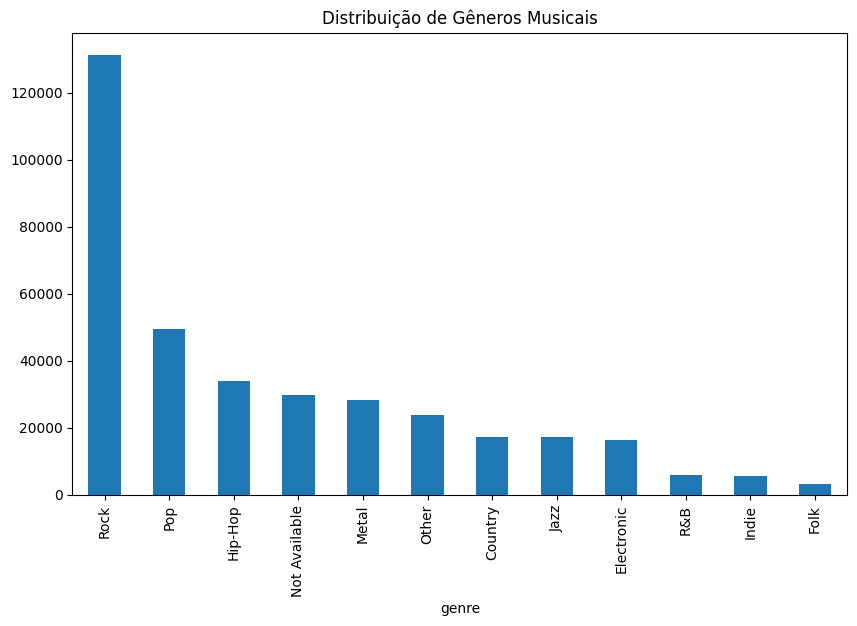

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from google.colab import drive

drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/lyrics.csv')
# Visualizar os dados
print(df.head())
print(df.info())
plt.figure(figsize=(10, 6))
df['genre'].value_counts().plot(kind='bar')
plt.title('Distribuição de Gêneros Musicais')
plt.show()

# Remover linhas vazias
df = df.dropna(subset=['lyrics'])

# Pré-processamento
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['lyrics'])
y = df['genre']

# Dados treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CNN
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=5, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(df['genre'].unique()), activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train.todense()[:, :, None], y_train, epochs=10, batch_size=32, validation_data=(X_test.todense()[:, :, None], y_test))

# AvaliaÇÃO
loss, accuracy = model.evaluate(X_test.todense()[:, :, None], y_test)
print('Perda:', loss)
print('Acurácia:', accuracy)

# Visualizar a matriz de confusão
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test.todense()[:, :, None])
y_pred_labels = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_labels)

plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.colorbar()
tick_marks = np.arange(len(df['genre'].unique()))
plt.xticks(tick_marks, df['genre'].unique(), rotation=90)
plt.yticks(tick_marks, df['genre'].unique())
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()